# **Bank Marketing Analysis**

**Detailed Column Descriptions**

1. ***Bank customer information:***

- age (numeric)
- job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
- marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- education (categorical: "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric)
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")

2. ***Related with the last contact of the current campaign:***
- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
- duration: last contact duration, in seconds (numeric)

3. ***Other attributes:***
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

4. **Output variable (desired target):**
- deposit - has the client subscribed a term deposit? (binary: "yes","no")


**Features Overview:**

1. **Numerical Features:** ‘age’, ‘balance’, ‘day’, ‘duration’, ‘campaign’, ‘pdays’, ‘previous’.
2. **Categorical Features:** ‘job’, ‘marital’, ‘education’, ‘default’, ‘housing’, ‘loan’, ‘contact’, ‘month’, ‘poutcome’, ‘deposit’.

## **Business Problem:**

The bank has recently conducted a marketing campaign to promote its new savings account product. However, the campaign did not yield the expected results in terms of customer acquisition and account openings. The bank wants to understand why the campaign did not perform as expected and identify opportunities for improvement in future marketing efforts.

# **Data Preparation**

In [74]:
#Load library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [77]:
#Copy DataFrame
df = bank.copy()

In [78]:
#Define the data shape rows and columns
df.shape #(rows, columns)

(45211, 17)

In [79]:
#Describe a basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [80]:
#List the columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [81]:
#Show unique data
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
deposit         2
dtype: int64

* Data Description

In [82]:
#Describe Categorial Data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [83]:
# Describe Numerical Data
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [84]:
columns = list(df.columns)
columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [85]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

## **Data Cleansing**

* Check NULL and Duplicated rows

In [86]:
df.isnull().sum() #Null

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [87]:
df.duplicated().sum() #Duplicated Rows

0

* Set new ordering columns

In [88]:
# Selecting columns of interest from the 'bank' DataFrame
selected_columns = ['deposit', 'age', 'job', 'marital', 'education', 'default', 'balance',
                    'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
                    'pdays', 'previous', 'poutcome']

# Creating a new DataFrame 'df' with selected columns
df = bank[selected_columns]
df.head()


,deposit,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,no,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,no,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,no,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,no,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


* Set month number

In [89]:
#Display Month
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [90]:
month_mapping = {'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'oct': 10, 'nov': 11, 'dec': 12, 'jan': 1, 'feb' : 2,'mar': 3, 'apr': 4, 'sep': 9}
df['month'] = df['month'].map(month_mapping)
df

,deposit,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,no,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown
1,no,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown
3,no,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown
4,no,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,unknown
45207,yes,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,unknown
45208,yes,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success
45209,no,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,unknown


In [91]:
#Show the non-numerical columns
non_numerical_cols = df.select_dtypes(exclude='number').columns.tolist()
non_numerical_cols

from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()
new_df = df.copy()

#Label Encoding
for cols in non_numerical_cols: #Use For-loop
    new_df[cols] = encoding.fit_transform(df[cols])

**Summary:**
1. The bank marketing dataset has 45,211 rows and 17 columns.
2. There's no *missing value* in any columns.
3. There's no *duplicated rows*.
4. Set the new ordering columns by set 'deposit' as the first row.
5. Convert 'month' columns into number each month.

### **Exploratory Data Analysis (EDA)**

### a. **Statistical Overview**

In [ ]:
#Describe the data
df.describe()

In [ ]:
#Describe the data
df.describe(include='O')

In [ ]:
#All the statistical overview of the customer from bank marketing
deposit_summary = new_df.describe()
deposit_summary

In [ ]:
new_df.groupby('deposit').mean()

**Result:**
1. The survey of customer banking had 45,211 and 17 features.
2. The conversion rate(the ratio of opened time deposit account) is 0.11.
3. The average age of the individuals in the dataset is approximately 41 years.
4. The most common day appears to be around the middle of the month, as indicated by the 50th percentile (median).
5. The 75% of customer have not been contacted previously, as indicated by the presence of -1 in the 25th, 50th, and 75th percentiles.
6. The average number of interactions in previous campaigns is approximately 0.58.
7. The average duration of calls is approximately 258 seconds (about 4 minutes and 18 seconds).
8. The shortest call duration is 0 seconds, which could conclude missed calls or very brief interactions.

 ### b.  **The Correlation Matrix(Heatmap)**

In [ ]:
#Plotting correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(new_df.corr(), fmt=".2f", cmap="YlGnBu", annot=True)

**Result:**
1. The top most highly **positive** correlated with time deposit opened account(deposit)
    - deposit vs. duration (0.39)
    - deposit vs. pdays (0.1)

2. The top most highly **negative** correlated with time deposit opened account(deposit)
    - deposit vs. contact (-0.15)
    - deposit vs. housing (-0.14)

3. The most highly **positive** correlated with feature
    - pdays vs. previous (0.45)
    - contact vs. poutcome (0.27)

4. The most highly **negative** correlated with feature
    - pdays vs. poutcome (-0.86)
    - poutcome vs. previous (-0.49)
    - marital vs. age (-0.40)

### c. **Distribution Plot**

* **Numerical Data Plot**

In [ ]:
#Plotting Histogram
df.hist(figsize=(15, 15), xrot=30)

* **Categorial Data Plot**

In [ ]:
df.columns

In [ ]:
# Create subplots
figure, axes = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axes
axes = axes.flatten()

# Plot each categorical column
categorical_columns = ['deposit', 'poutcome', 'marital', 'education', 'default', 'housing', 'contact', 'loan', 'job']

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### c. **Feature Analysis** 

- **Deposit Campaign Opening Account (deposit vs. age)**

In [ ]:
# Calculate the count and percentage of each category in the 'deposit' column
deposit_counts = df['deposit'].value_counts()
deposit_percentages = df['deposit'].value_counts(normalize=True) * 100
# Combine the counts and percentages into a DataFrame
deposit_summary = pd.DataFrame({'Count': deposit_counts, 'Percentage(%)': deposit_percentages})
deposit_summary


In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Time Deposit Opened Account')
plt.xlabel('Deposit Category')
plt.ylabel('Count')
ax = sns.countplot(data=df, x='deposit', hue='deposit')
plt.show()

**Result:**
1. For the last campaign, customer who open deposit account is around 5,289 accounts from 45,211.
2. The conversion rate was 0.116 (11.6% of total customer in campaign).

* **Age Distribution (deposit vs. age)**

In [ ]:
def age_cal(age):
    if age < 30:
        age_range = '18 - 29 Years'
    elif age < 42:
        age_range = '30 - 41 Years'
    elif age < 54:
        age_range = '42 - 53 Years'
    elif age < 65:
        age_range = '54 - 65 Years'
    elif age < 78:
        age_range = '66 - 77 Years'
    elif age < 89:
        age_range = '78 - 89 Years'
    else:
        age_range = '90 years above'
    return age_range

#Set function
df['age_range'] = df['age'].apply(lambda x: age_cal(x))

# Calculate the count and percentage of each category in the 'deposit' column
age_counts = df['age_range'].value_counts()
age_percentages = df['age_range'].value_counts(normalize=True) * 100
# Combine the counts and percentages into a DataFrame
age_summary = pd.DataFrame({'Count': age_counts, 'Percentage(%)': age_percentages})
age_summary

In [ ]:
age_range = df.pivot_table(values='job', index='age_range', columns='deposit', aggfunc='count')
age_range

In [ ]:
# Calculate the total count for each age range
total_counts = age_range.sum(axis=1)
# Divide each count in age_range by its respective total count and multiply by 100 to get percentages
percentage_age_range = (age_range.div(total_counts, axis=0) * 100).round(2)
percentage_age_range

In [ ]:
plt.figure(figsize=(10, 6))
ax = age_range.plot(kind='bar')
plt.title('Count of Jobs by Age Range and Deposit')
plt.xlabel('Deposit')
plt.ylabel('Age Range')
plt.show()


**Result:**
1. The age range around 40-50 years was peak distribution for open time deposit account.
2. The age range around 30-41 years was the highest chance to open time deposit account.


* **Job Destribution (deposit vs. job)**

In [ ]:
# Calculate the count and percentage of each category in the 'deposit' column
job_counts = df['job'].value_counts()
job_percentages = df['job'].value_counts(normalize=True) * 100
# Combine the counts and percentages into a DataFrame
job_summary = pd.DataFrame({'Count': job_counts, 'Percentage(%)': job_percentages})
job_summary

In [ ]:
df.pivot_table(values='age', index='job', columns='deposit', aggfunc='count')

In [ ]:
#Compute and get the order of Job distribution
job_count = df['job'].value_counts()

plt.figure(figsize=(10,5))
plt.title('Job Distribution', size=16)
plt.xlabel('Job', size=10)
plt.ylabel('Employee count', size=10)
ax = sns.countplot(x='job', data=df, hue='deposit')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.grid(True)
plt.show()

**Result:**

The management, technician and blue-collar were the most open the time deposit account in last campaign.


* **Education Type Distribution (deposit vs. education)**

In [ ]:
# Calculate the count and percentage of each category in the 'deposit' column
education_counts = df['education'].value_counts()
education_percentages = df['education'].value_counts(normalize=True) * 100
# Combine the counts and percentages into a DataFrame
education_summary = pd.DataFrame({'Count': education_counts, 'Percentage(%)': education_percentages})
education_summary

In [ ]:
df.pivot_table(values='balance', index='education', columns='deposit', aggfunc='count')

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Education Type Distribution', size=16)
plt.xlabel('Education', size=10)
plt.ylabel('Education count', size=10)
ax = sns.countplot(x='education', data=df, hue='deposit')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

plt.grid(True)
plt.show()

**Result:**

For the last campaign, the secondary education(2,450) had most open time deposit account and followed by tertiary(1,996).

In [ ]:
plt.figure(figsize=(15, 15))
ax = sns.boxplot(x='job', y='balance', hue='deposit', data=df[df['loan']=='yes'], orient='v' )

In [ ]:
plt.figure(figsize=(15, 15))
sns.boxplot(x='job', y='balance', hue='deposit', data=df[df['loan']=='no'], orient='v' )

* **Marital Status Distribution (deposit vs. marital)**

In [ ]:
# Calculate the count and percentage of each category in the 'deposit' column
marital_counts = df['marital'].value_counts()
marital_percentages = df['marital'].value_counts(normalize=True) * 100
# Combine the counts and percentages into a DataFrame
marital_summary = pd.DataFrame({'Count': marital_counts, 'Percentage(%)': marital_percentages})
marital_summary

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Marital Status Distribution', size=16)
plt.xlabel('Marital Status', size=10)
plt.ylabel('Marital count', size=10)
ax = sns.countplot(x='marital', data=df, hue='deposit')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.grid(True)
plt.show()

**Result:**

1. Married customers had the most opened time deposit account.
2. Focus on single customer may not differ significantly from married customers to open time deposit account.

* **Contact Type Distribution with Deposit (deposit vs. contact)**

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Contact Type Distribution', size=16)
plt.xlabel('Contact', size=10)
plt.ylabel('Contact count', size=10)
ax = sns.countplot(x='contact', data=df, hue='deposit')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.grid(True)
plt.show()

**Result:**

The cellular contact type has impact to open time deposit account.

* **Housing Loan Status Distribution (deposit vs. housing)** 

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Housing Loan Status', size=16)
plt.xlabel('Status', size=10)
plt.ylabel('Customer count', size=10)
ax = sns.countplot(x='housing', data=df, hue='deposit')
plt.grid(True)
plt.show()

**Result:**

The customer who didn't have an housing loan had a high chance to open time deposit account.

* **Loan Status with Time Deposit Decision**

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Loan Status with Time Deposit', size=16)
plt.xlabel('Status', size=10)
plt.ylabel('Customer count', size=10)
ax = sns.countplot(x='loan', data=df, hue='deposit')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.grid(True)
plt.show()

**Result:**

The customer who didn't have an personal loan had a high chance to open time deposit account.

* **Last Contact Month Distribution with Deposit (deposit vs. month)**

In [ ]:
df.pivot_table(values='age', index='month', columns='deposit', aggfunc='count')

In [ ]:
pivot_table = df.pivot_table(values='age', index='month', columns='deposit', aggfunc='count')

# Calculate the total count for each month
total_count_per_month = pivot_table.sum(axis=1)
(pivot_table.div(total_count_per_month, axis=0) * 100).round(2)

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Last Contact Month Distribution', size=16)
plt.xlabel('Education', size=10)
plt.ylabel('Education count', size=10)
ax = sns.countplot(x='month', data=df, hue='deposit')
plt.grid(True)
plt.show()

**Result:**

On May to August had a highest peak of customer who opened time deposit account.

* **The amount of contact campaign in deposit decision**

In [ ]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.countplot(x='campaign', hue='deposit', data=df)
plt.xlim(right=10)
plt.xlabel('')
plt.subplot(2, 1, 2)
sns.countplot(x='campaign', hue='deposit', data=df)
plt.xlim(left=11)
plt.ylim(top=30)
plt.xlabel('# of Campaign', fontsize=14)
plt.show()

**Result:**

The chart show that when customer had more campaign contact, the chance for open time deposit account was decreased.

* **The previous outcome in last campaign**

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="poutcome", hue="deposit", data=df)
plt.title("Previous Outcome", fontsize=14)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.show()

* **The credit in default distribution**

In [ ]:
plt.figure(figsize=(10, 5))
plt.xlabel("Has Default on Credit?", fontsize=14)
ax = sns.countplot(x="default", hue="deposit", data=df)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

plt.show()

* **The balance distribution**

In [ ]:
print('The average balance is',df['balance'].mean())
print('The median balance is',df['balance'].median())

In [ ]:
deposit_yes = df[df['deposit'] == 'yes']
print('Balance of customer have time deposit account')
print('The average balance is',deposit_yes['balance'].mean())
print('The median balance is',deposit_yes['balance'].median())# Assuming df is your DataFrame containing the 'balance' and 'deposit' columns

Q1 = deposit_yes['balance'].quantile(0.25)
Q3 = deposit_yes['balance'].quantile(0.75)

print("First Quartile (Q1):", Q1)
print("Third Quartile (Q3):", Q3)

In [ ]:
plt.figure(figsize=(18,4))
plt.title('Balance Distribution in Deposit',size=16)
plt.xlabel('Balance',size=10)
plt.ylabel('Deposit',size=10)
sns.boxplot(x = df['balance'], y = df['deposit'])
plt.grid(True)
plt.show()

**Result:**

1. The customer who open time deposit has median(733 euros) balance in account.
2. In customer who open time deposit has 1st quartile with 210 and 3rd quartile with 2,159 euros.

* **Last Duration Contact (seconds)**

In [ ]:
plt.figure(figsize=(12,4))
plt.title('Last Duration Distribution (seconds)',size=16)
plt.xlabel('Duration',size=10)
plt.ylabel('Deposit',size=10)
sns.boxplot(x = df['duration'], y = df['deposit'])
plt.grid(True)
plt.show()

In [ ]:
avg_duration = df['duration'].mean()

def set_duration(x):
    if x > avg_duration:
        type_duration = "Above average duration"
    else:
        type_duration = "Below average duration"
    return type_duration

df['duration_type'] = df['duration'].apply(lambda x: set_duration(x))


In [ ]:
print('The average time duration is ',avg_duration)

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Duration Type Distribution', size=16)
plt.xlabel('Duration Status', size=10)
plt.ylabel('Duration count', size=10)
ax = sns.countplot(x='duration_type', data=df, hue='deposit')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.grid(True)
plt.show()

**Result:**

1. The customer who has a last contact duration campaign have an high chance to open time deposit account.

2. When the customer had above average contact duration, the customer had more likelihood to open the time deposit accounts in previous campaign.

# **Feature Engineering**

* **Handle Outlier on Numerical Features**

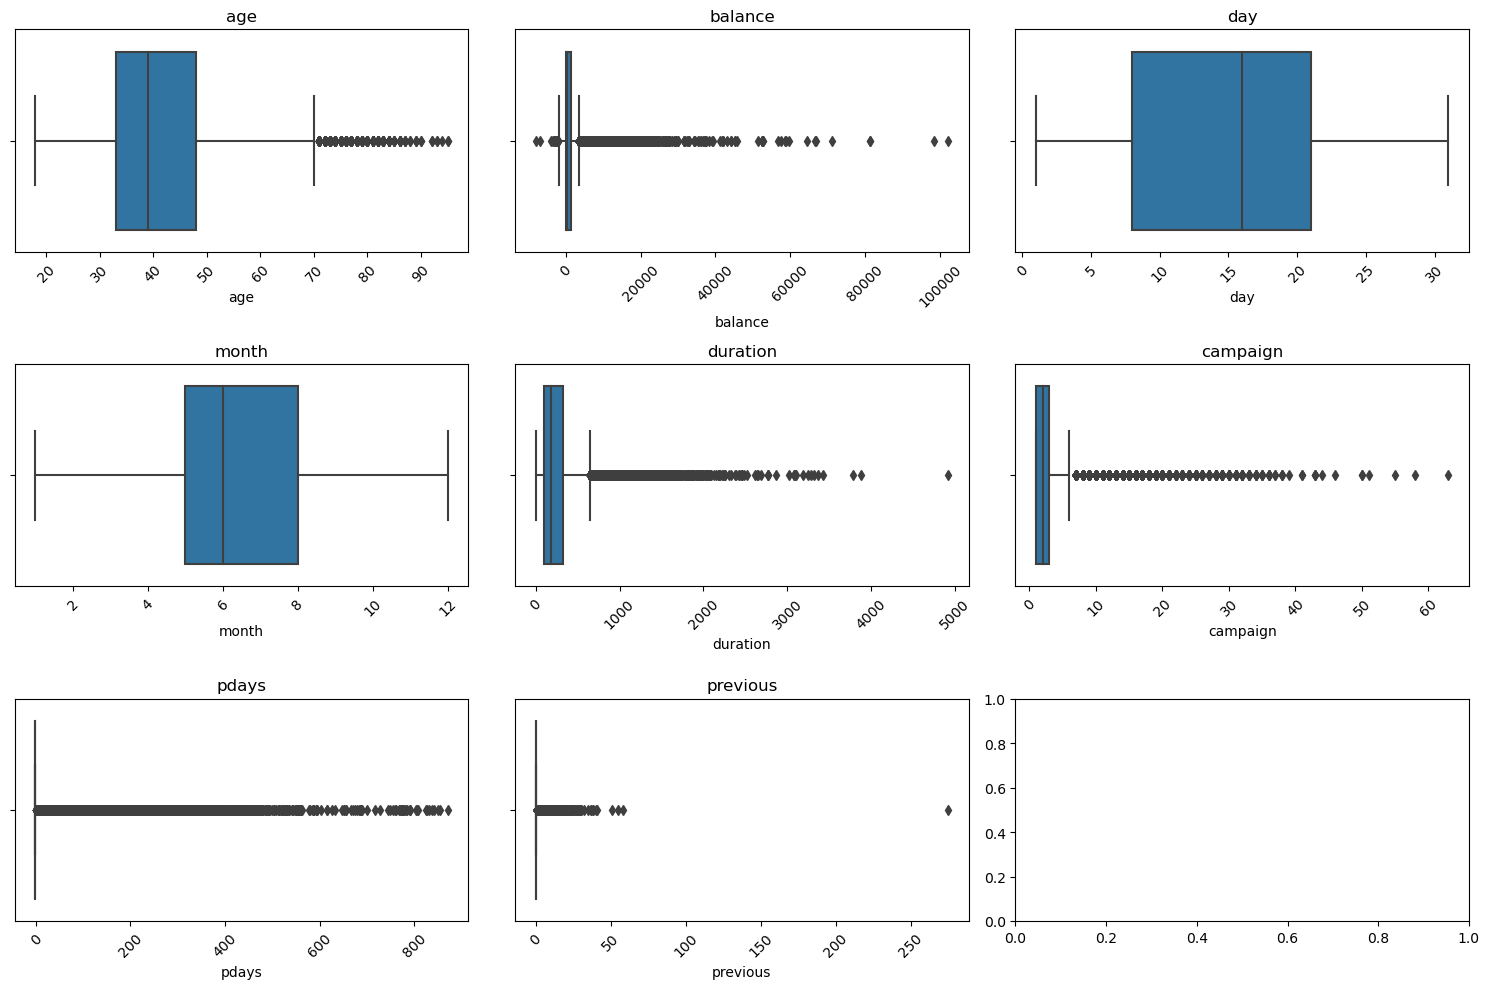

In [92]:
# Create subplots
figure, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot each numerical column
numerical_columns = list(df.select_dtypes(include=['int', 'float']).columns)

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()


In [93]:
for cols in numerical_columns:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    filter = (df[cols] >= Q1 - 1.5*IQR) & (df[cols] <= Q3 + 1.5*IQR)
    df = df.loc[filter]

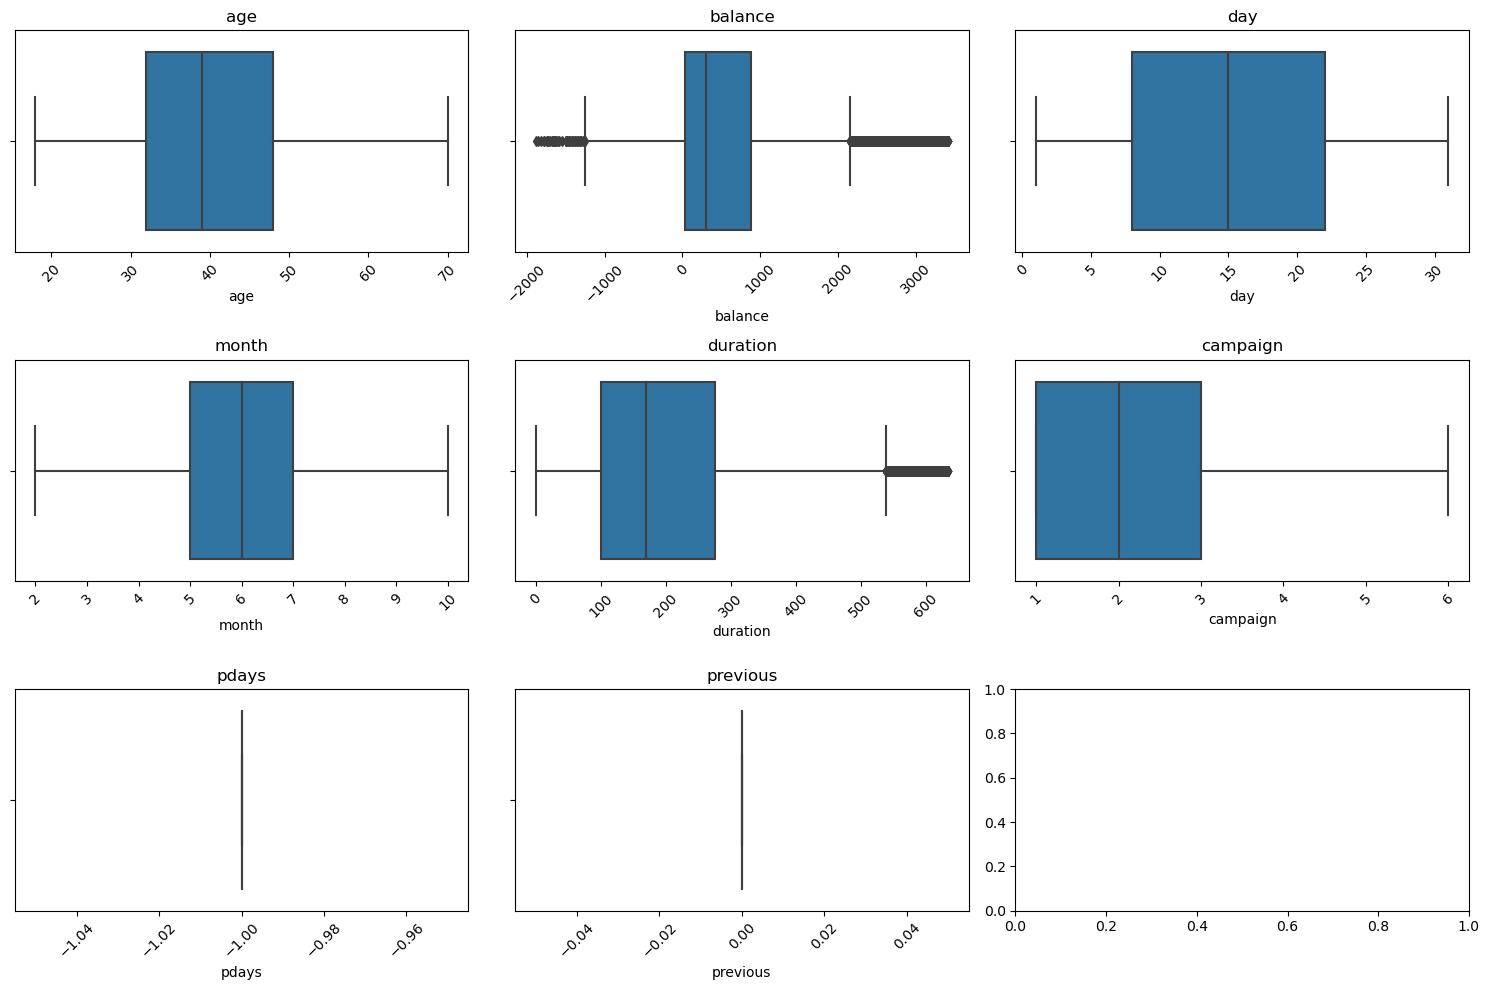

In [94]:
# Create subplots
figure, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot each numerical column
numerical_columns = list(df.select_dtypes(include=['int', 'float']).columns)

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()


* **Encoding Data**

In [95]:
#Show the non-numerical columns
non_numerical_cols = df.select_dtypes(exclude='number').columns.tolist()
non_numerical_cols

['deposit',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome']

In [96]:
# Preprocessing (Non-numerical columns to Numerical columns)
# Using LabelEncoder

from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()
new_df = df.copy()

#Label Encoding
for cols in non_numerical_cols: #Use For-loop
    new_df[cols] = encoding.fit_transform(df[cols])

In [107]:
#Set target and feature.
X = new_df.drop(columns='deposit')
y = new_df['deposit']

* **Standardization**

In the machine learning model is useful when exactly aware of the feature distribution of data or, in other words, a data follows a Gaussian distribution. However, this does not have to be necessarily true. Unlike Normalization, Standardization does not necessarily have a bounding range, so if you have outliers in your data, they will not be affected by Standardization.

In [108]:
#Show the numerical columns
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [109]:
#Standardization: Fit the scaler on the training data and transform the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

* **Splitting Train and Test data.**

In [110]:
from sklearn.model_selection import train_test_split
#Splitting train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Shape train and test
print('The shape of X train: ',X_train.shape)
print('The shape of X test: ',X_test.shape)
print('The shape of y train: ',y_train.shape)
print('The shape of y test: ',y_test.shape)

The shape of X train:  (20244, 16)
The shape of X test:  (5062, 16)
The shape of y train:  (20244,)
The shape of y test:  (5062,)


## **Model Implementation**
**Logistic regression** is well-suited for binary classification problems where the outcome variable is binary, meaning it has only two possible outcomes. In this case, predicting whether a customer would open time deposit account(yes/no).

In [102]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [114]:
from sklearn.metrics import accuracy_score
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of Logistic Regression: {:.2f}%".format(accuracy * 100))

The accuracy of Logistic Regression: 94.51%


**Summary:**
- Preprocessing with Standardization(Z-score) on numerical columns('age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous').
- Splitting the dataset with training 80% and testing 20%.
- Implementing logistic regression classifier for prediction.
- The accuracy of testing data is around 89%.

# **Feature Importance**

Feature importance refers to techniques that calculate a score for all the input features for a given model. The scores represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

In [113]:
feature_columns = list(new_df.columns)

<Axes: ylabel='Feature'>

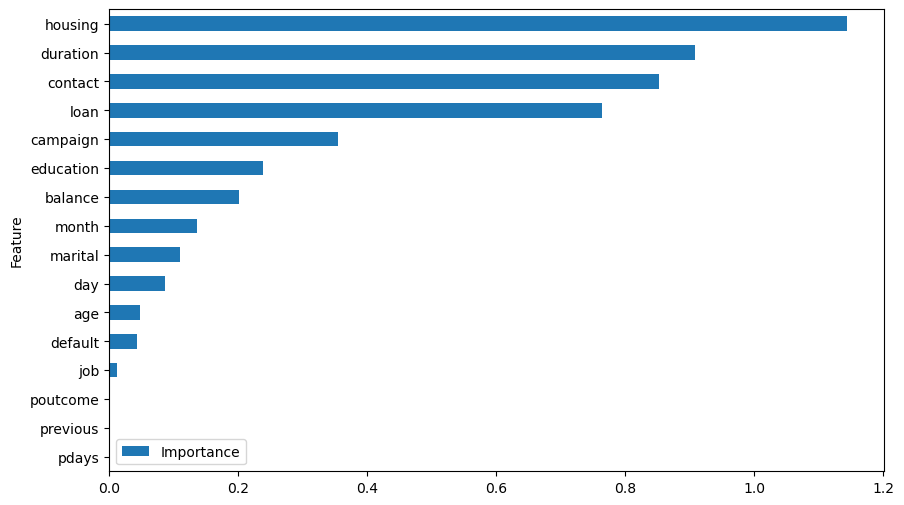

In [115]:
coefficients = logistic.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [116]:
feature_importance.sort_values('Importance', ascending=False)

,Feature,Importance
6,housing,1.143812
11,duration,0.908057
8,contact,0.851570
7,loan,0.763495
12,campaign,0.354887
3,education,0.239289
5,balance,0.200670
10,month,0.136658
2,marital,0.110737
9,day,0.086509


In [117]:
#Intercept of Logistic Regression Algorithm
logistic.intercept_

array([-1.9533504])

In [118]:
#Coefficients of Logistic Regression Algorithm
logistic.coef_

array([[-0.04849093,  0.0123297 ,  0.11073671,  0.23928871, -0.04407135,
         0.20066981, -1.14381169, -0.76349467, -0.85156988,  0.08650931,
        -0.13665783,  0.90805742, -0.35488683,  0.        ,  0.        ,
         0.        ]])

In [119]:
#Coefficients and intercept
coefficients = logistic.coef_[0]
intercept = logistic.intercept_[0]

#Get feature names
feature_names = X.columns

#Generate logistic regression equation
equation = f"Log(odds) = {intercept:.4f} "
for feature, coef in zip(feature_names, coefficients):
    equation += f" + ({coef:.2f} * {feature})"
print(equation)


Log(odds) = -1.9534  + (-0.05 * age) + (0.01 * job) + (0.11 * marital) + (0.24 * education) + (-0.04 * default) + (0.20 * balance) + (-1.14 * housing) + (-0.76 * loan) + (-0.85 * contact) + (0.09 * day) + (-0.14 * month) + (0.91 * duration) + (-0.35 * campaign) + (0.00 * pdays) + (0.00 * previous) + (0.00 * poutcome)


**Result:**
* The top importance features:
    * housing
    * duration
    * loan
    * contact
* The intercept of logistic regression equation is -1.95.
* The coefficient are -0.04849093,  0.0123297 ,  0.11073671,  0.23928871, -0.04407135,
         0.20066981, -1.14381169, -0.76349467, -0.85156988,  0.08650931,
        -0.13665783,  0.90805742, -0.35488683,  0, 0, 0.
* The equation is ***Log(odds) = -1.9534  + (-0.05 * age) + (0.01 * job) + (0.11 * marital) + (0.24 * education) + (-0.04 * default) + (0.20 * balance) + (-1.14 * housing) + (-0.76 * loan) + (-0.85 * contact) + (0.09 * day) + (-0.14 * month) + (0.91 * duration) + (-0.35 * campaign)***

# **Model Evaluation**

**Confusion Matrix**

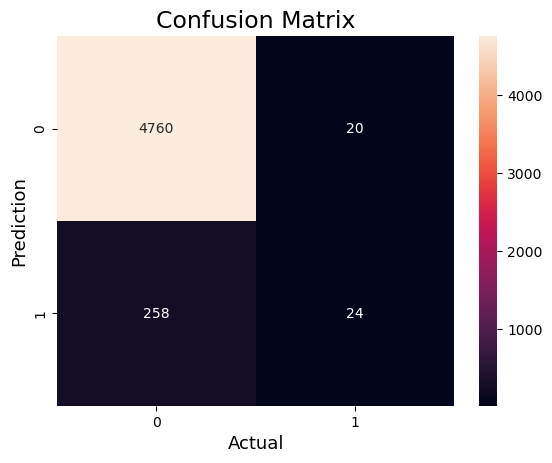

In [120]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True,fmt='g',)
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [121]:
print('True negative = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True positive = ', cm[1][1])

True negative =  4760
False positive =  20
False negative =  258
True positive =  24


**Precision and Recall**

In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [123]:
print ("---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logistic.predict(X_test))
print ("AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logistic.predict(X_test)))

---Logistic Model---
AUC = 0.54
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4780
           1       0.55      0.09      0.15       282

    accuracy                           0.95      5062
   macro avg       0.75      0.54      0.56      5062
weighted avg       0.93      0.95      0.93      5062



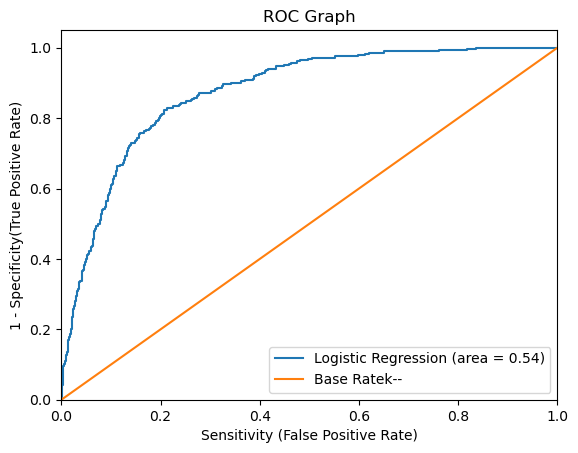

In [127]:
#Print the ROC graph
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:,1])
plt.figure()

#Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Sensitivity (False Positive Rate)')
plt.ylabel('1 - Specificity(True Positive Rate)')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

**Result:**
1. The confusion matrix result is telling us that we have 4760+24 correct predictions and 258+20 incorrect predictions.
2. The classification report reviews that we have 95% precision which means the accuracy of the model classifier not ot label an instance positive.
3. The **area under curve (AUC)** of logistic regression model is around 0.54.

## **Recommending Actions**

* **Age Range Impact:** In the next marketing campaign, the range age around 30 - 53 years had highly chance to open term deposit with 78.91%.


* **Campaign Call Time:** The campaign call should not more than 4 times which can affect to customer decision with open time deposit campaign account. So, the more campaign calling the same customer, they would declined to campaign offering.

* **Occupation Job:** The retired and management is highly likelihood to open time deposit account. Both retired and management who have positive average balance account would be suggest(around 210 - 2,159 euros). Because when customer have more average balance, they have a high chance to open time deposit account.


* **Personal Loan Status:** The next bank marketing campaign, the customer who not have the loan status was suggested. Due to customer who have personal loans status would having a loan might also signal to the bank that the customer's income is already allocated towards repayment, which could affect their ability to consistently contribute to a time deposit over its term.

* **Marital Status:** Married and Single customers should be targeted. The reason are married or single customer would have a long-term financial with time deposit account and even major  life events such as marriage, starting a family, or retirement.

* **House Loan Status:** The customer who did not have housing loan is target for the next bank marketing campaign. Due to the customer who not have to loan from bank, they have less chance to open term deposit account.

* **Contact Time Duration:** As the statistics show that the customer who had above average contact duration campaign, they had likelihood to open time deposit account. So, focusing to contact duration with around the average duration (258.16 seconds) by communicant might have more question during the calls by providing an interesting question to increase more potential to targeted customers leading to an increase probability to open a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will execute.


* **Trending Month:** For focusing last month contact on April, May, June, July, and August had the highest had a highest open time deposit would be suggested.

* **Contact Type:** In contact type, the cellular mobile type would be suggested for targeting customers.